In [2]:
import numpy as np
import pandas as pd
from pyteomics import mgf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


Bad key "text.kerning_factor" on line 4 in
/home/tribiosis/miniconda3/envs/plt2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
def plot_spectrum_from_reader(spectrum, title):
    plt.style.use('seaborn-poster')
    font = {'fontname': 'DejaVu Sans'}  # 'DejaVu Sans'
    plt.xlabel('m/z', **font)
    plt.ylabel('intensity', **font)
    plt.xlabel('m/z')
    y = spectrum["intensity array"]
    x = spectrum["m/z array"]
    zipped = list(zip(x, y))
    df = pd.DataFrame(zipped, columns=['m/z', 'Intensity'])
    plt.stem('m/z', 'Intensity', data=df, basefmt="C2", linefmt='black', label= "m/z values")
    plt.title(title)
    plt.show()

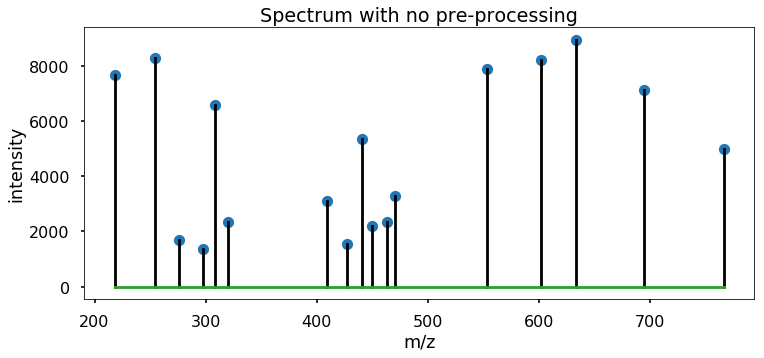

In [19]:
plt.figure(figsize=(12,5))
reader = mgf.read('test.mgf')
for spectrum in reader[0:1]: #read the first spectrum 
    plot_spectrum_from_reader(spectrum, "Spectrum with no pre-processing")

In [4]:
for line in open("test.mgf"):
    if line[:4]=="PEPM":
        precursor = line.strip().split("=")[-1]
print("The precursor ion m/z is", precursor)

The precursor ion m/z is 765.797485351563


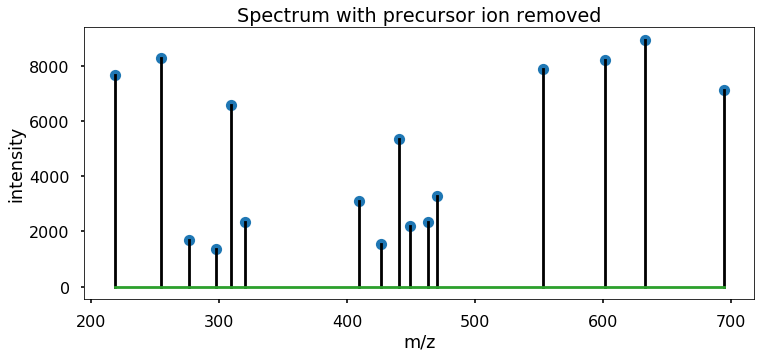

In [13]:
plt.figure(figsize=(12,5))
reader = mgf.read('test_precrem01Da.mgf')
for spectrum in reader[0:1]: #read the first spectrum 
    plot_spectrum_from_reader(spectrum, "Spectrum with precursor ion removed")

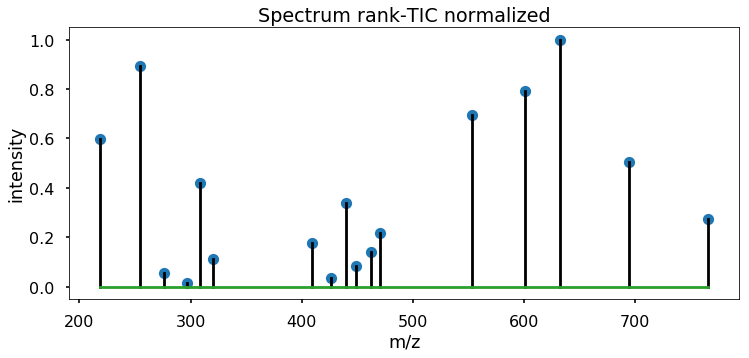

In [22]:
plt.figure(figsize=(12,5))
reader = mgf.read('test_rankTIC.mgf')
for spectrum in reader[0:1]: #read the first spectrum 
    plot_spectrum_from_reader(spectrum, "Spectrum rank-TIC normalized")

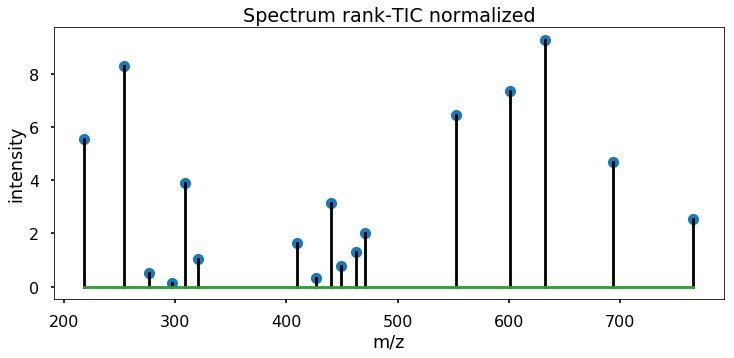

In [23]:
plt.figure(figsize=(12,5))
reader = mgf.read('test_rank_highestpeak.mgf')
for spectrum in reader[0:1]: #read the first spectrum 
    plot_spectrum_from_reader(spectrum, "Spectrum rank highest peak normalized")